# 분류

## 1. 분류란?
<span style="background-color: green">회귀 vs 분류</span>
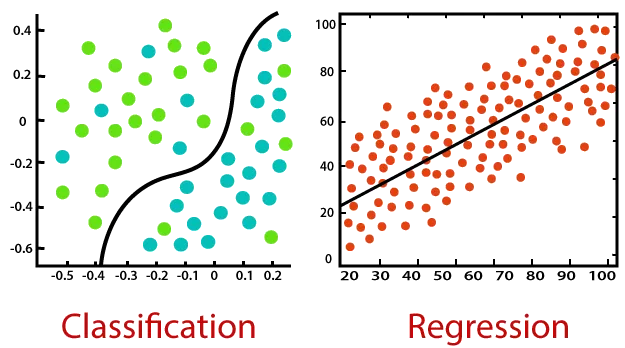
- 회귀: 연속적 변수 예측
- 분류: 범주형 변수 예측, 데이터를 주어진 항목으로 나눔

<span style="background-color: green">분류 종류</span>
- 이진 분류: 예측할 변수의 값 = 2개 (참/거짓)
- 다중 분류: 예측할 변수의 값 = 3개 이상

## 2. 분류 모델
<span style="background-color: green">1. 로지스틱 회귀</span>
### 개념
- 이진 분류 문제에 사용
- 특정 클래스에 속할 확률(0~1) 추정 -> 분류!
- 값이 0~1이면서 s자 형태로 그려지는 함수 이용 필요성

### 시그모이드 함수 (sigmoid function)
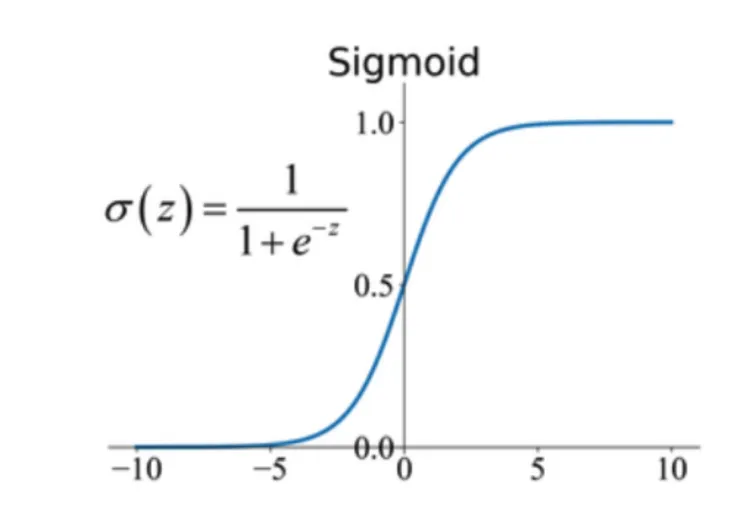
- 출력: 0~1 사이, S자 형태
- 입력값 커지면 1에 수렴, 작아지면 0에 수렴
- <pre><code>def sigmoid(x):     
    return 1/(1+np.exp(-x))</code></pre>
- 적합한 가중치(w, b) 계산해서 찾음!
    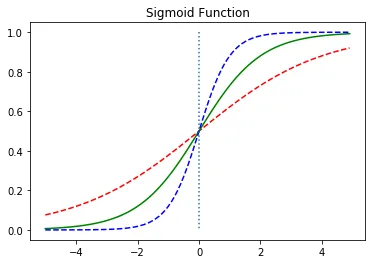
    w에 따른 그래프 변화
    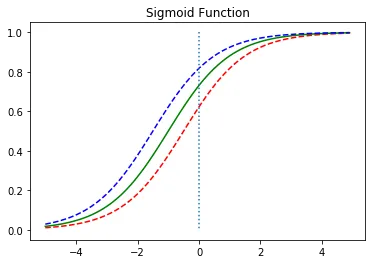
    b에 따른 그래프 변화

<span style="background-color: green">2. 의사결정 나무</span>
### 개념
- 조건에 따라 데이터 분류
- 순수한 label의 집합 될 때까지 반복

### 구성 요소
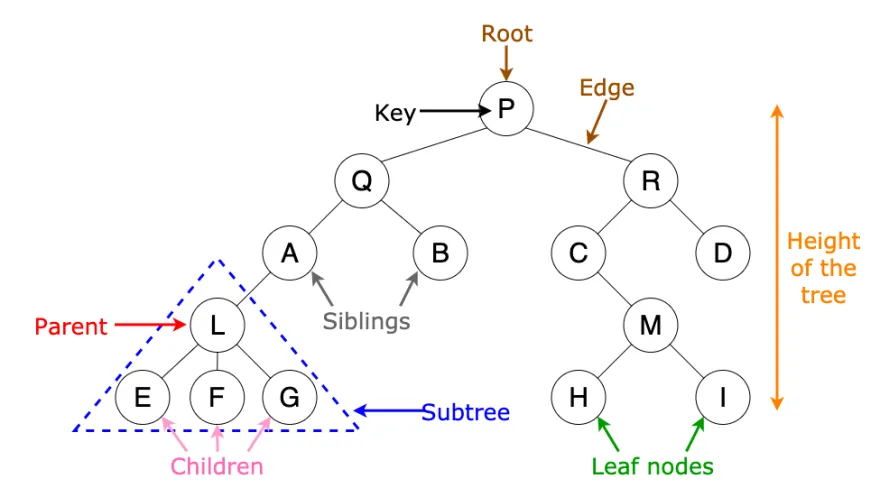
- Root node: 제일 상위 노드
- Parent node: 부모 노드
- Child node: 자식 노드
- Binary Tree(이진 트리): 자식이 최대 2개
- Leaf node: 자식 없는 노드 (label)
- Edge: 노드 연결선
- Height: 특정 노드 - 가장 먼 리프 노드 edge 수
- Depth: 루트 노드 - 특정 노드 edge 수

### CART(Classification And Regression Tree, 이진분할)
- 데이터셋 -> 임계값 기준 두 자식으로 나눔 (불순도 낮아지는 방향)
- 불순도 -> 지니 지수로 확인 (0: 순수도 높음 <-> 1: 순수도 낮음)
    => 지니 계수 값 작아지는 방향으로 학습!
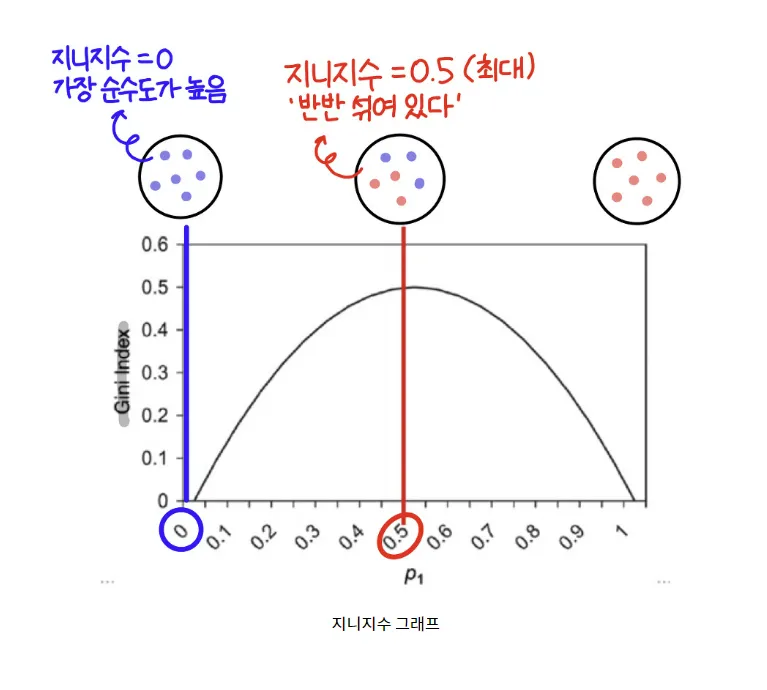

#### CART 과정
1. 임계값 설정 -> 데이터 그룹화
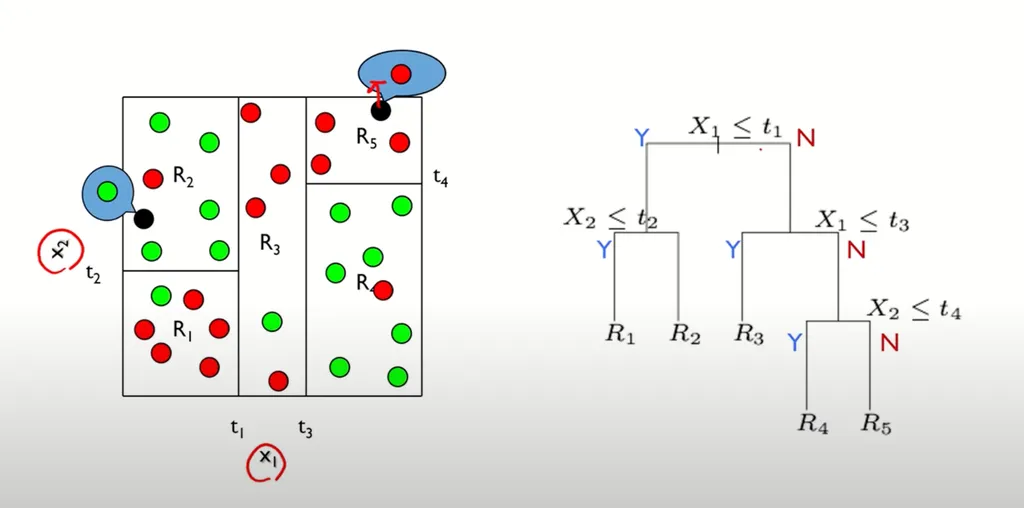
2. 불순도 감소 알고리즘: 불순도 낮은 쪽으로 가지 형성
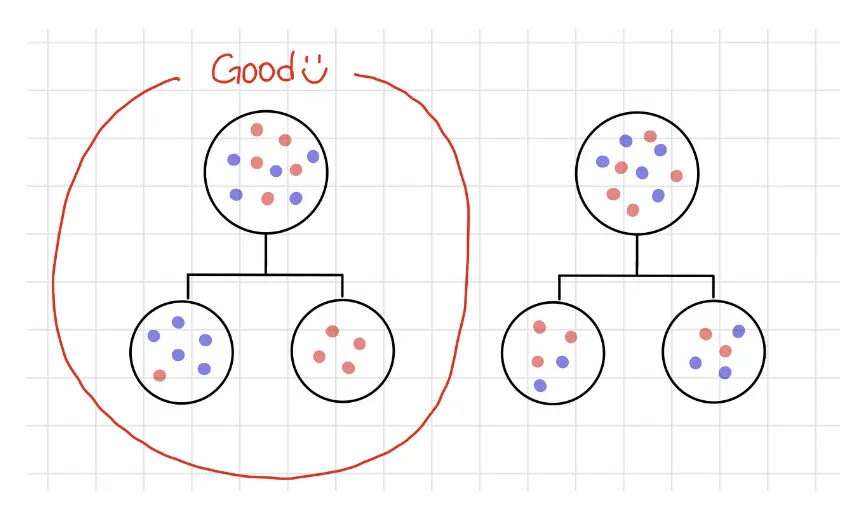

#### 학습 시 고려할 점
1. 하이퍼파라미터 설정
- min_samples_split: 노드 최소 샘플 수
- min_samples_leaf: 리프 노드 최소 샘플 수
- min_weight_fraction_leaf: 가중치 부여된 샘플 비율
- max_leaf_nodes: 리프 노드 최대 개수
- max_features: 분할에 사용되는 특성 최대 개수

2. 시각화
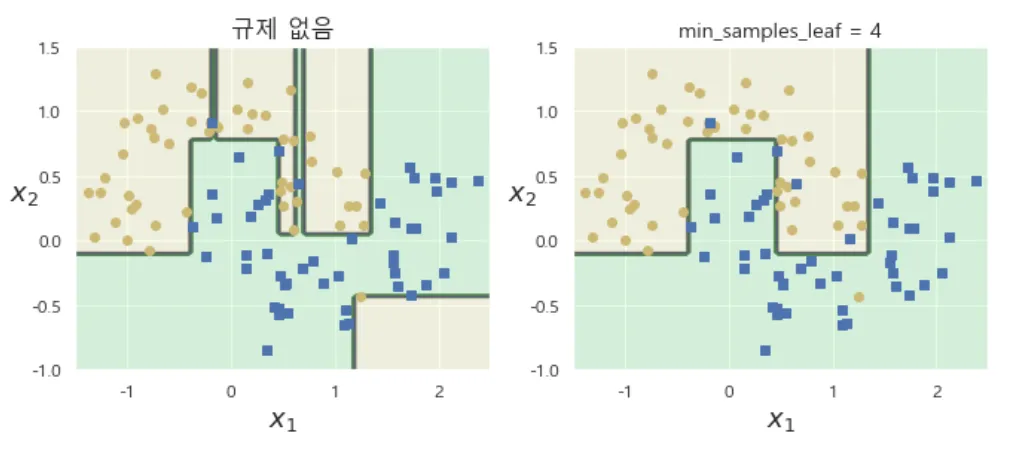
min_samples_leaf 하이퍼파라미터 조정 -> 분류 적절

3. Pruning(가지 치기)
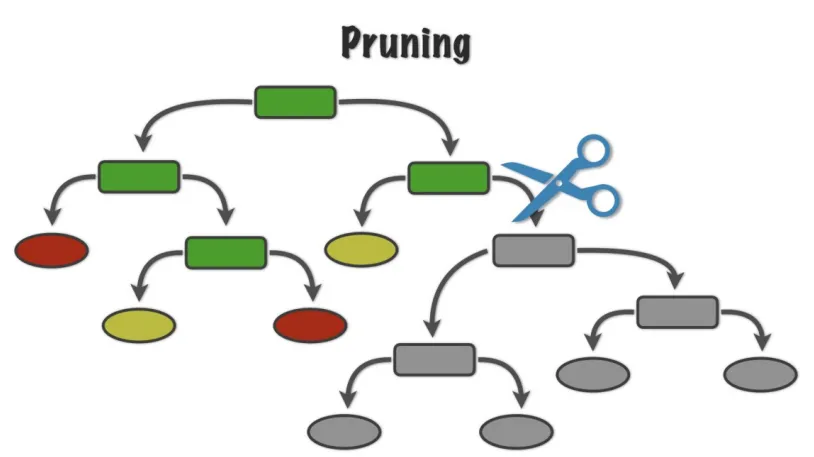
- 노드 수 너무 많아지는 것 방지 -> 일부 노드 제거

<span style="background-color: green">3. SVM (Support Vector Machine)</span>
### 개념
- 클래스 분류하는 경계선 중 최적의 선 찾기
- 데이터와 가장 거리가 먼 초평면 선택 (margin이 큰 경우)
    => why? 초평면과 가장 가까운 데이터 사이 거리를 최대화 -> 분류 안정성 확보

### 구성 요소
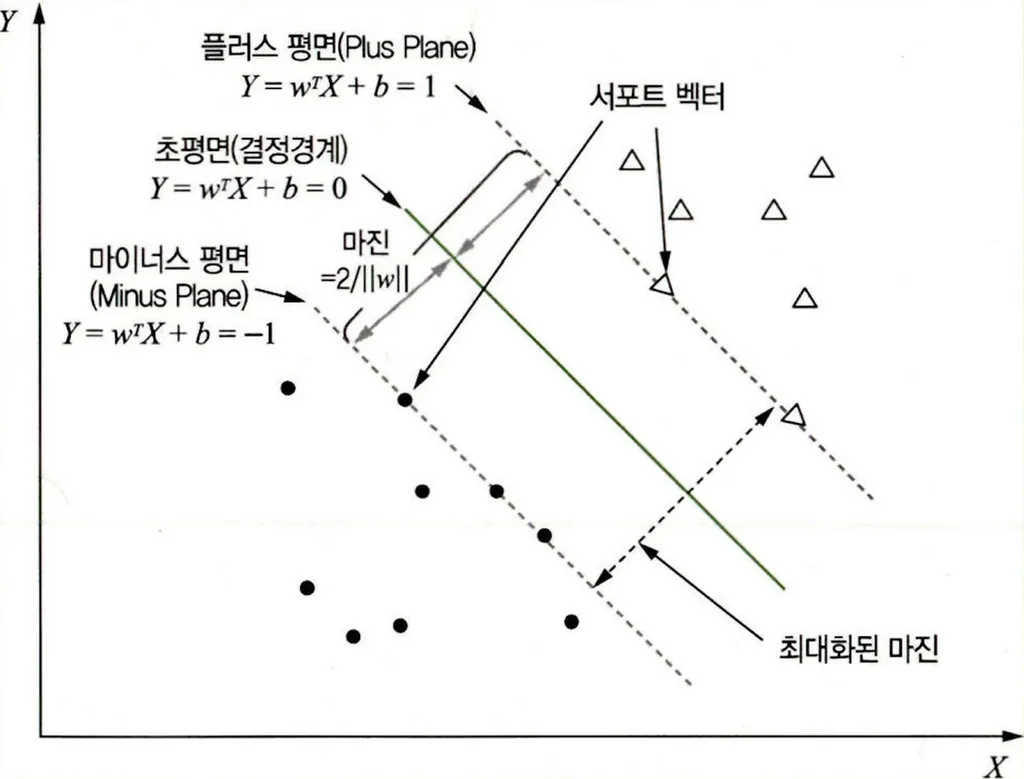
- support vector: 결정 경계와 가장 가까운 데이터들 집합
- decision boundary: 결정 경계
- margin: 결정 경계 - 서포트 벡터 거리
- hyperplane: 초평면(n차원 공간 -> n-1차원 평면)
- slack variables: 완벽 분리 불가능 -> 분류 위해 허용된 오차 변수

### 장단점
1. 장점
- 과적합 가능성 & 노이즈 영향 적음
- 정확성 뛰어남
- 비선형 모델 분류 가능
- 서포트 벡터와의 거리만 계산 -> 연산량 최소화
- 데이터 적을 때 효과적

2. 단점
- 데이터 전처리 과정 중요
- 데이터 많아짐 -> 평가 과정 많아짐 -> 속도 저하

<span style="background-color: green">4. KNN (K-Nearest Neighbor)</span>
### 개념
- k개의 이웃(거리가 가까운 다른 데이터 레이블) 기반 -> 분류

### 과정
1. 데이터 준비: 학습 필요 없음!!!
2. K값 설정: 동점 발생 방지 위해 홀수 설정
3. 거리 계산: 새 데이터 <-> 기존 모든 데이터 거리 계산
    => 유클리드 거리, 맨해튼 거리 사용
4. 가장 가까운 k개 이웃 선택: 거리 가장 작은 k개!
5. 분류: 가장 많이 등장하는 클래스 = 결과
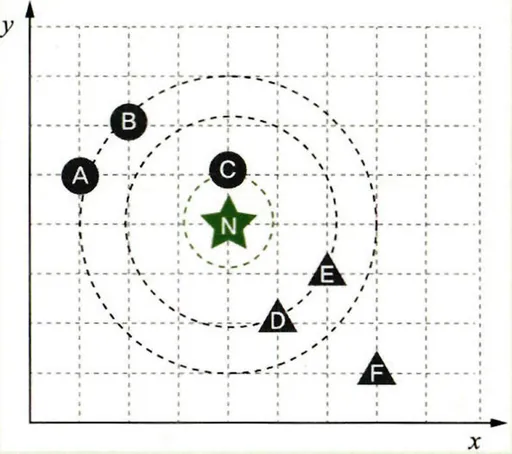       
-> k = 1: C 기반 분류      
-> k = 3: C, D, E 기반 분류

### 장단점
1. 장점
- 범주 기준 몰라도 분류 가능
- 학습 가정 필요 없음
- 새 데이터 처리 용이

2. 단점
- 테스트 데이터 개수 <-> 시간 비례
- 학습 데이터 모두 거리 계산 -> 데이터 양과 시간 비례
- 적당한 k값 결정 어려움
- 이상치 존재 시 큰 영향

## 3. 분류 평가 지표
<span style="background-color: green">1. 혼동 행렬</span>
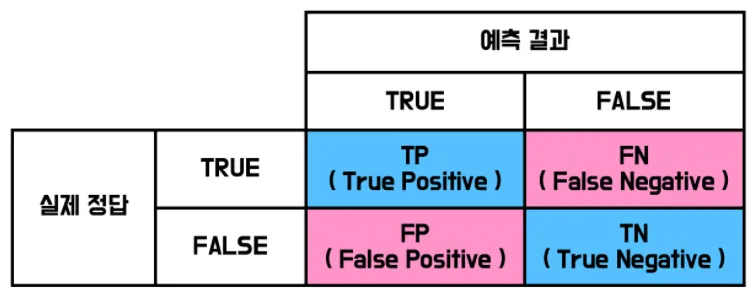
- 예측 성공 여부 + 예측값 -> 4가지 경우의 수

### 혼동 행렬 이용한 분류 모델 평가 지표
1. 정확도: 참 비율
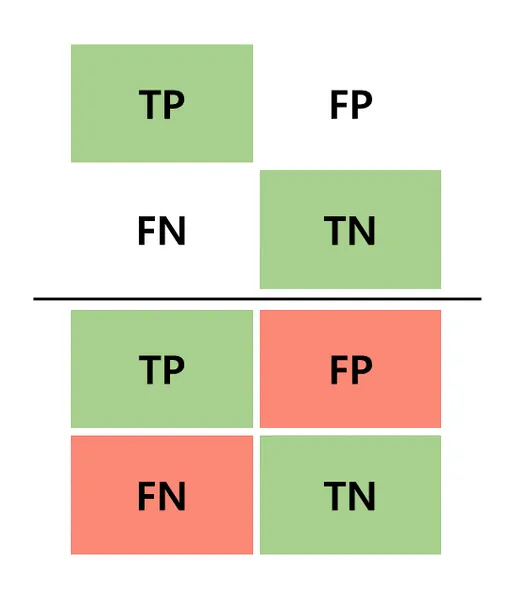
- (TP + TN) / (TP + TN + FP + FN)
- 정답 레이블 불균형 -> 정확도 신뢰 불가

2. 정밀도(Precision): 참 예측 경우 -> 실제 참 비율
- TP / TP + FP
- 정밀도 높음 = 거짓을 참으로 예측한 정도 낮음

3. 재현도(Recall): 실제로 참 -> 참 예측 비율
- TP / TP + FN
- 재현도 높음 = 참을 거짓으로 예측한 정도 낮음

#### Precision - Recall Trade-off 관계
- Threshold: 모델의 참/거짓을 가르는 분류 기준
- Threshold 낮춤 -> 참 예측 증가 -> recall 증가, precision 감소
- Threshold 높임 -> 참 예측 감소 -> recall 감소, precision 증가
=> 정밀도 & 재현도 그래프 교점 = Threshold로 정하기!
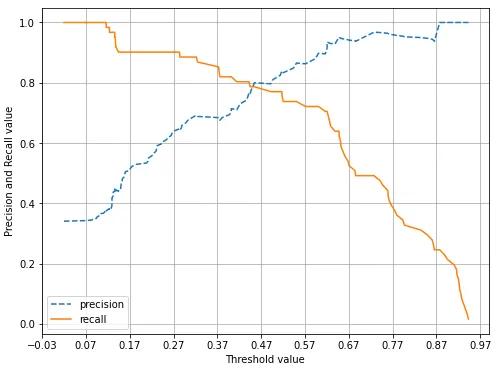

<span style="background-color: green">2. F1-Score</span>
- 정밀도 & 재현율 조화 평균
- 머신러닝 모델 성능 평가 주요 지표
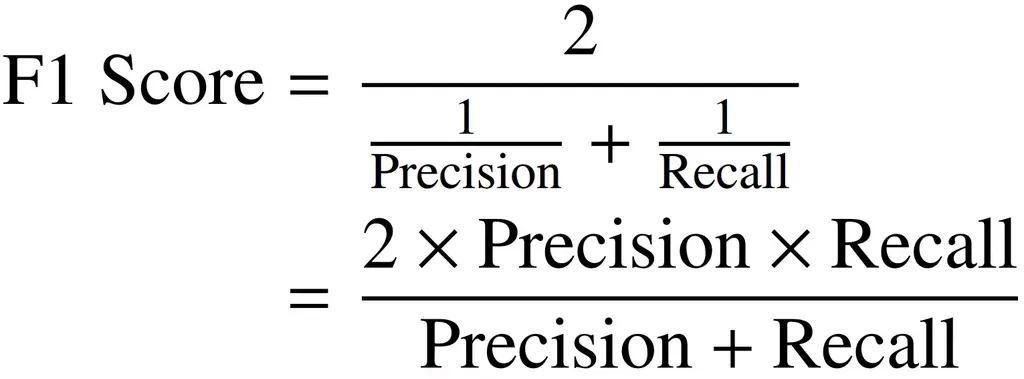

<span style="background-color: green">3. ROC</span>
- 얼마나 분류가 잘 되었는지 시각화
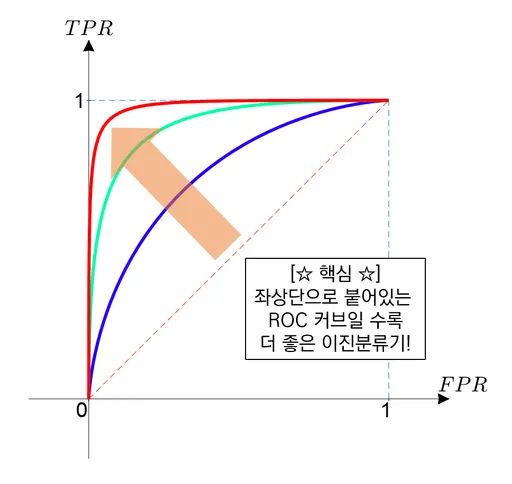
- TPR(True Positive Rate): 참 중 참 예측 비율 = Recall
- FPR(False Positive Rate): 거짓 중 참 예측 비율

<span style="background-color: green">4. AUC</span>
- ROC - x축 면적 (적분값)
- 0.5 (성능 나쁨) <-> 1 (성능 좋음)
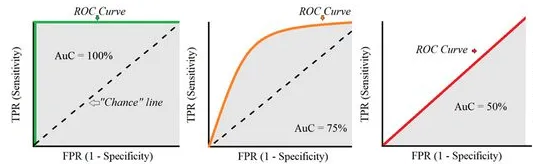

### 다중 분류 평가 지표
- Macro average: 클래스별 평가 지표 평균
- Weighted average: 클래스별 평가 지표 & 클래스 샘플 수 가중 평균
- Micro average: 클래스 예측 결과 합산

## 4. 하이퍼파라미터 회적화
<span style="background-color: green">1. 하이퍼파라미터</span>
- 힉습 시작 전 사용자가 직접 설정하는 변수
- 적절한 하이퍼파라미터 찾음 -> 성능 향상
- ex) max_depth, n_estimators
- 탐색 범위 설정 -> 평가 지표 계산 함수 정의 -> 정확도 평가

<span style="background-color: green">2. 최적화 방법</span>
1. Grid search
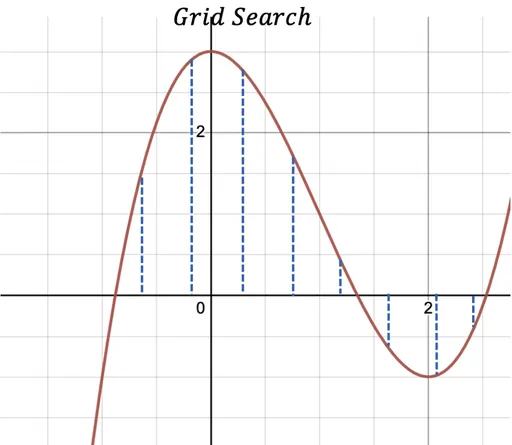
- 정해진 범위 내에서 모든 값 순회
- 장점: 전 범위 탐색 -> 정확히 최적의 파라미터 찾음
- 단점: 범위가 너무 넓음

2. Random Search
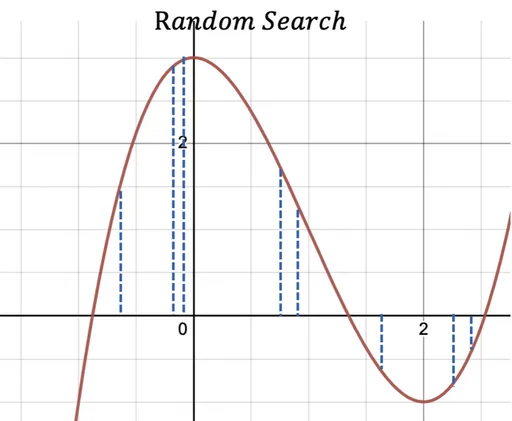
- 정해진 범위 내에서 무작위로 탐색
- 장점: 그리드 서치보다 속도 빠름
- 단점: 무작위 -> 정확도 감소

3. Bayesian optimization
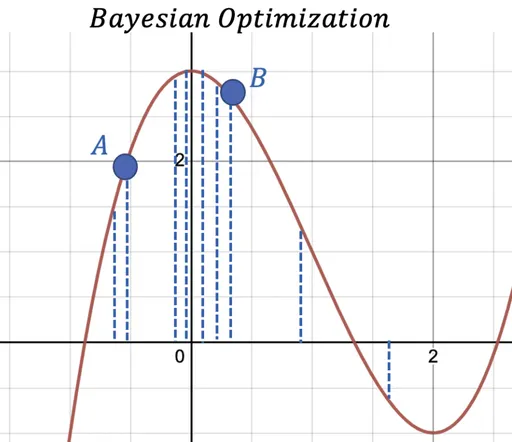
- 사전 정보 바탕 -> 최적값 확률적으로 추정

4. Optuna
- 하이퍼파라미터 최적화 자동화
- 교차 검증 -> 일반화 성능 평가